### Imports

In [73]:
import IPython.display as ipd
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from DataLoaderUrbanSounds import DataLoaderUrbanSounds
import numpy as np

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Sample audio

In [2]:
librosa_audio_data, librosa_sample_rate = librosa.load('UrbanSound8K/audio/fold4/7389-1-0-6.wav')

(88200,)


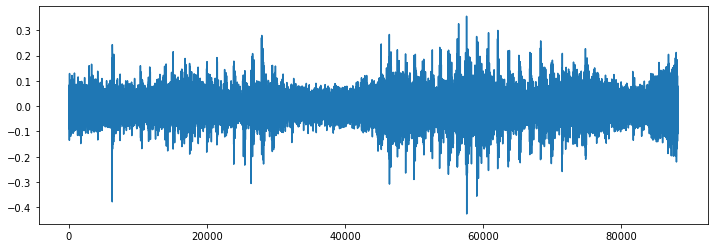

In [3]:
print(librosa_audio_data.shape)
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
ipd.Audio('UrbanSound8K/audio/fold4/7389-1-0-6.wav')

### Exploring Metadata

In [4]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### Training method

In [5]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint


def train(model, num_epochs, num_batch_size, X_train, y_train, X_test, y_test):
    ## Trianing my model
    checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                                   verbose=1, save_best_only=True)
    start = datetime.now()

    model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),
              callbacks=[checkpointer], verbose=1)

    duration = datetime.now() - start
    print("Training completed in time: ", duration)

**instantiate DataLoaderUrbanSound class**

In [140]:
dl = DataLoaderUrbanSounds(128)  # you can choose your own dim

**extract features from all aduio files**


In [141]:
dl.extract_features()

8732it [11:44, 12.39it/s]


**Get Training Data**

In [142]:
# get X (train) data
X, _ = dl.get_train_test_data()

# get y (target) based on the encoder to use
y = dl.get_target_as_one_hot_encoder()
# y = dl.get_target_as_label_encoder()

**split data into train and test**

In [143]:
X_train, X_test, y_train, y_test = dl.split_to_train_test_data(X, y, 0.3);

## Build model and feed in the data

In [62]:
acc_m2 = CNN1D_Model.evaluate(X_test, y_test, verbose=0)

y_pred_m2 = CNN1D_Model.predict(X_test, verbose=0)

In [69]:
loss, accuracy = CNN1D_Model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 91.641223


In [167]:
X_train.shape[0]

6112

In [ ]:
def test(filename, model):
    mfccs_scaled_features=dl.get_one_file_features_extractor(filename).reshape(-1,40,1)
    predicted_label= np.argmax(model.predict(mfccs_scaled_features),1)
    print(predicted_label)
    prediction_class = dl.decode_label(predicted_label)
    print(prediction_class)

## ANN

In [160]:
# Construct model 
num_labels = y.shape[1]
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(750,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(250,activation="relu"))
model.add(Dense(num_labels ,activation="softmax"))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1000)              129000    
                                                                 
 dropout_27 (Dropout)        (None, 1000)              0         
                                                                 
 dense_73 (Dense)            (None, 750)               750750    
                                                                 
 dropout_28 (Dropout)        (None, 750)               0         
                                                                 
 dense_74 (Dense)            (None, 500)               375500    
                                                                 
 dropout_29 (Dropout)        (None, 500)               0         
                                                                 
 dense_75 (Dense)            (None, 250)             

In [161]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
)

In [162]:
num_epochs = 50
num_batch_size = 64

ANN_Results = model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

model.save("Model1.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)


Epoch 1/50
96/96 [==============================] - 3s 23ms/step - loss: 3.3669 - accuracy: 0.2201 - val_loss: 1.7691 - val_accuracy: 0.3977
Epoch 2/50
96/96 [==============================] - 2s 19ms/step - loss: 1.8404 - accuracy: 0.3382 - val_loss: 1.5094 - val_accuracy: 0.4782
Epoch 3/50
96/96 [==============================] - 2s 22ms/step - loss: 1.5945 - accuracy: 0.4386 - val_loss: 1.2991 - val_accuracy: 0.5855
Epoch 4/50
96/96 [==============================] - 2s 20ms/step - loss: 1.3986 - accuracy: 0.5205 - val_loss: 1.1453 - val_accuracy: 0.6187
Epoch 5/50
96/96 [==============================] - 2s 22ms/step - loss: 1.2341 - accuracy: 0.5839 - val_loss: 0.9866 - val_accuracy: 0.6870
Epoch 6/50
96/96 [==============================] - 3s 26ms/step - loss: 1.0576 - accuracy: 0.6484 - val_loss: 0.8773 - val_accuracy: 0.7076
Epoch 7/50
96/96 [==============================] - 3s 34ms/step - loss: 0.9342 - accuracy: 0.6883 - val_loss: 0.7889 - val_accuracy: 0.7546
Epoch 8/50
96

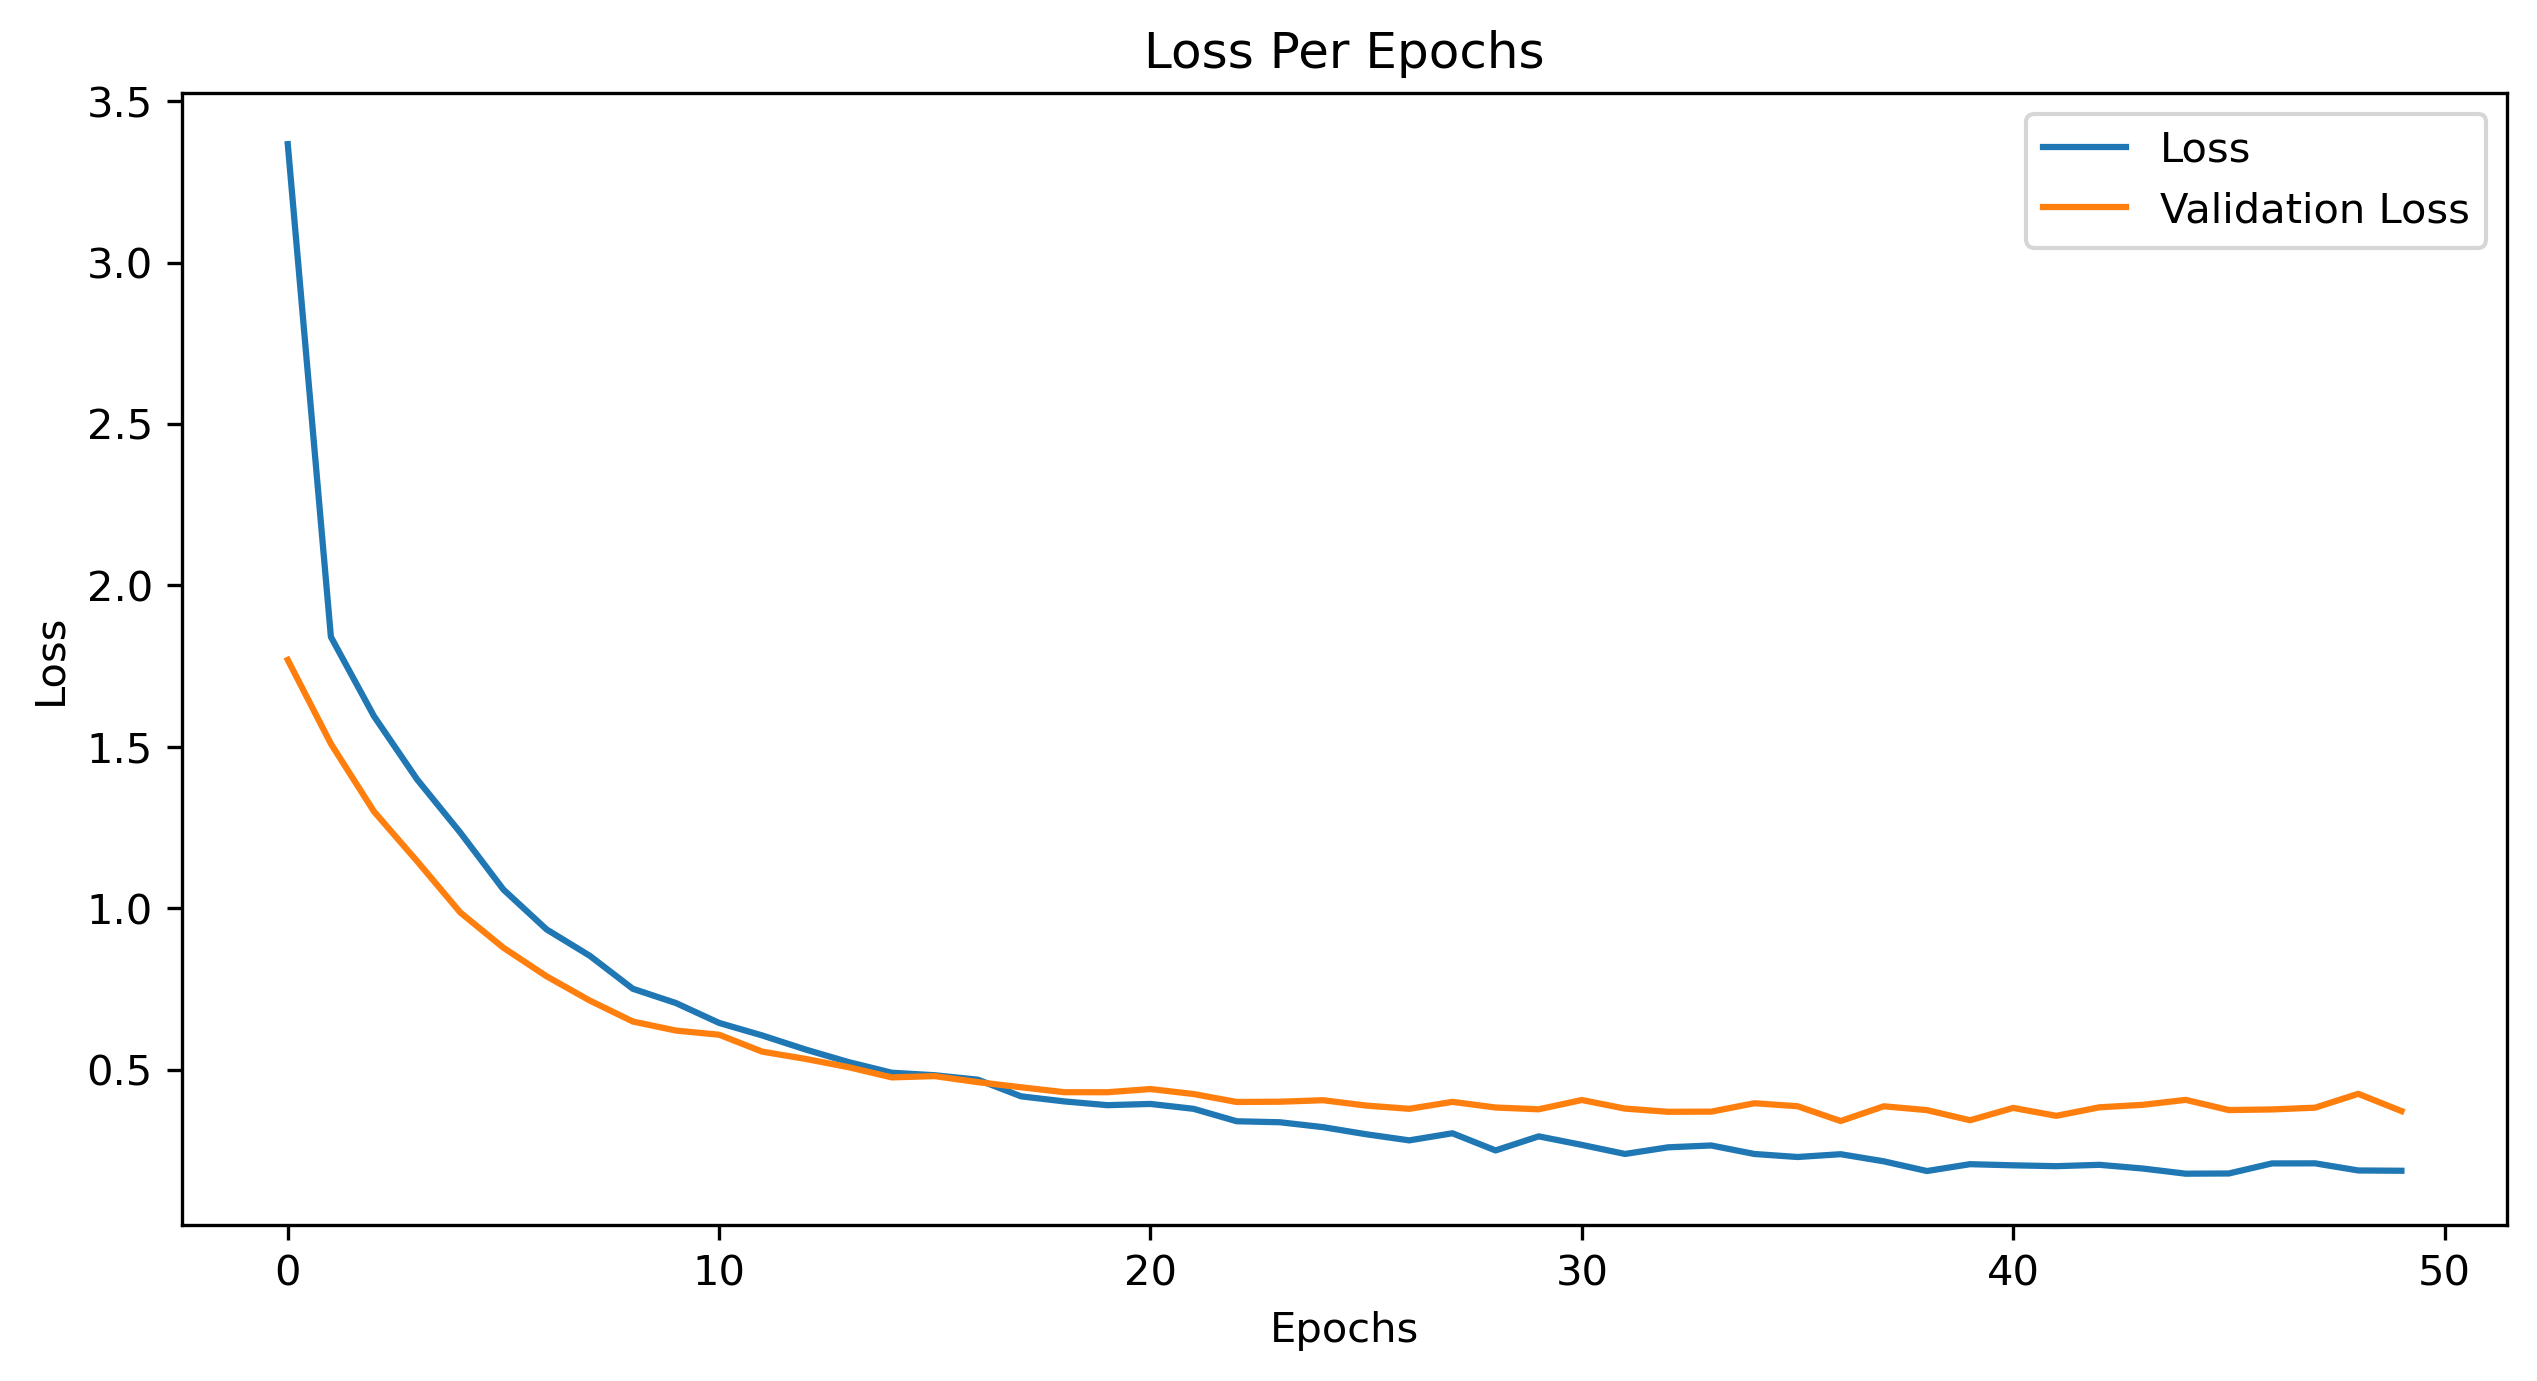

In [163]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

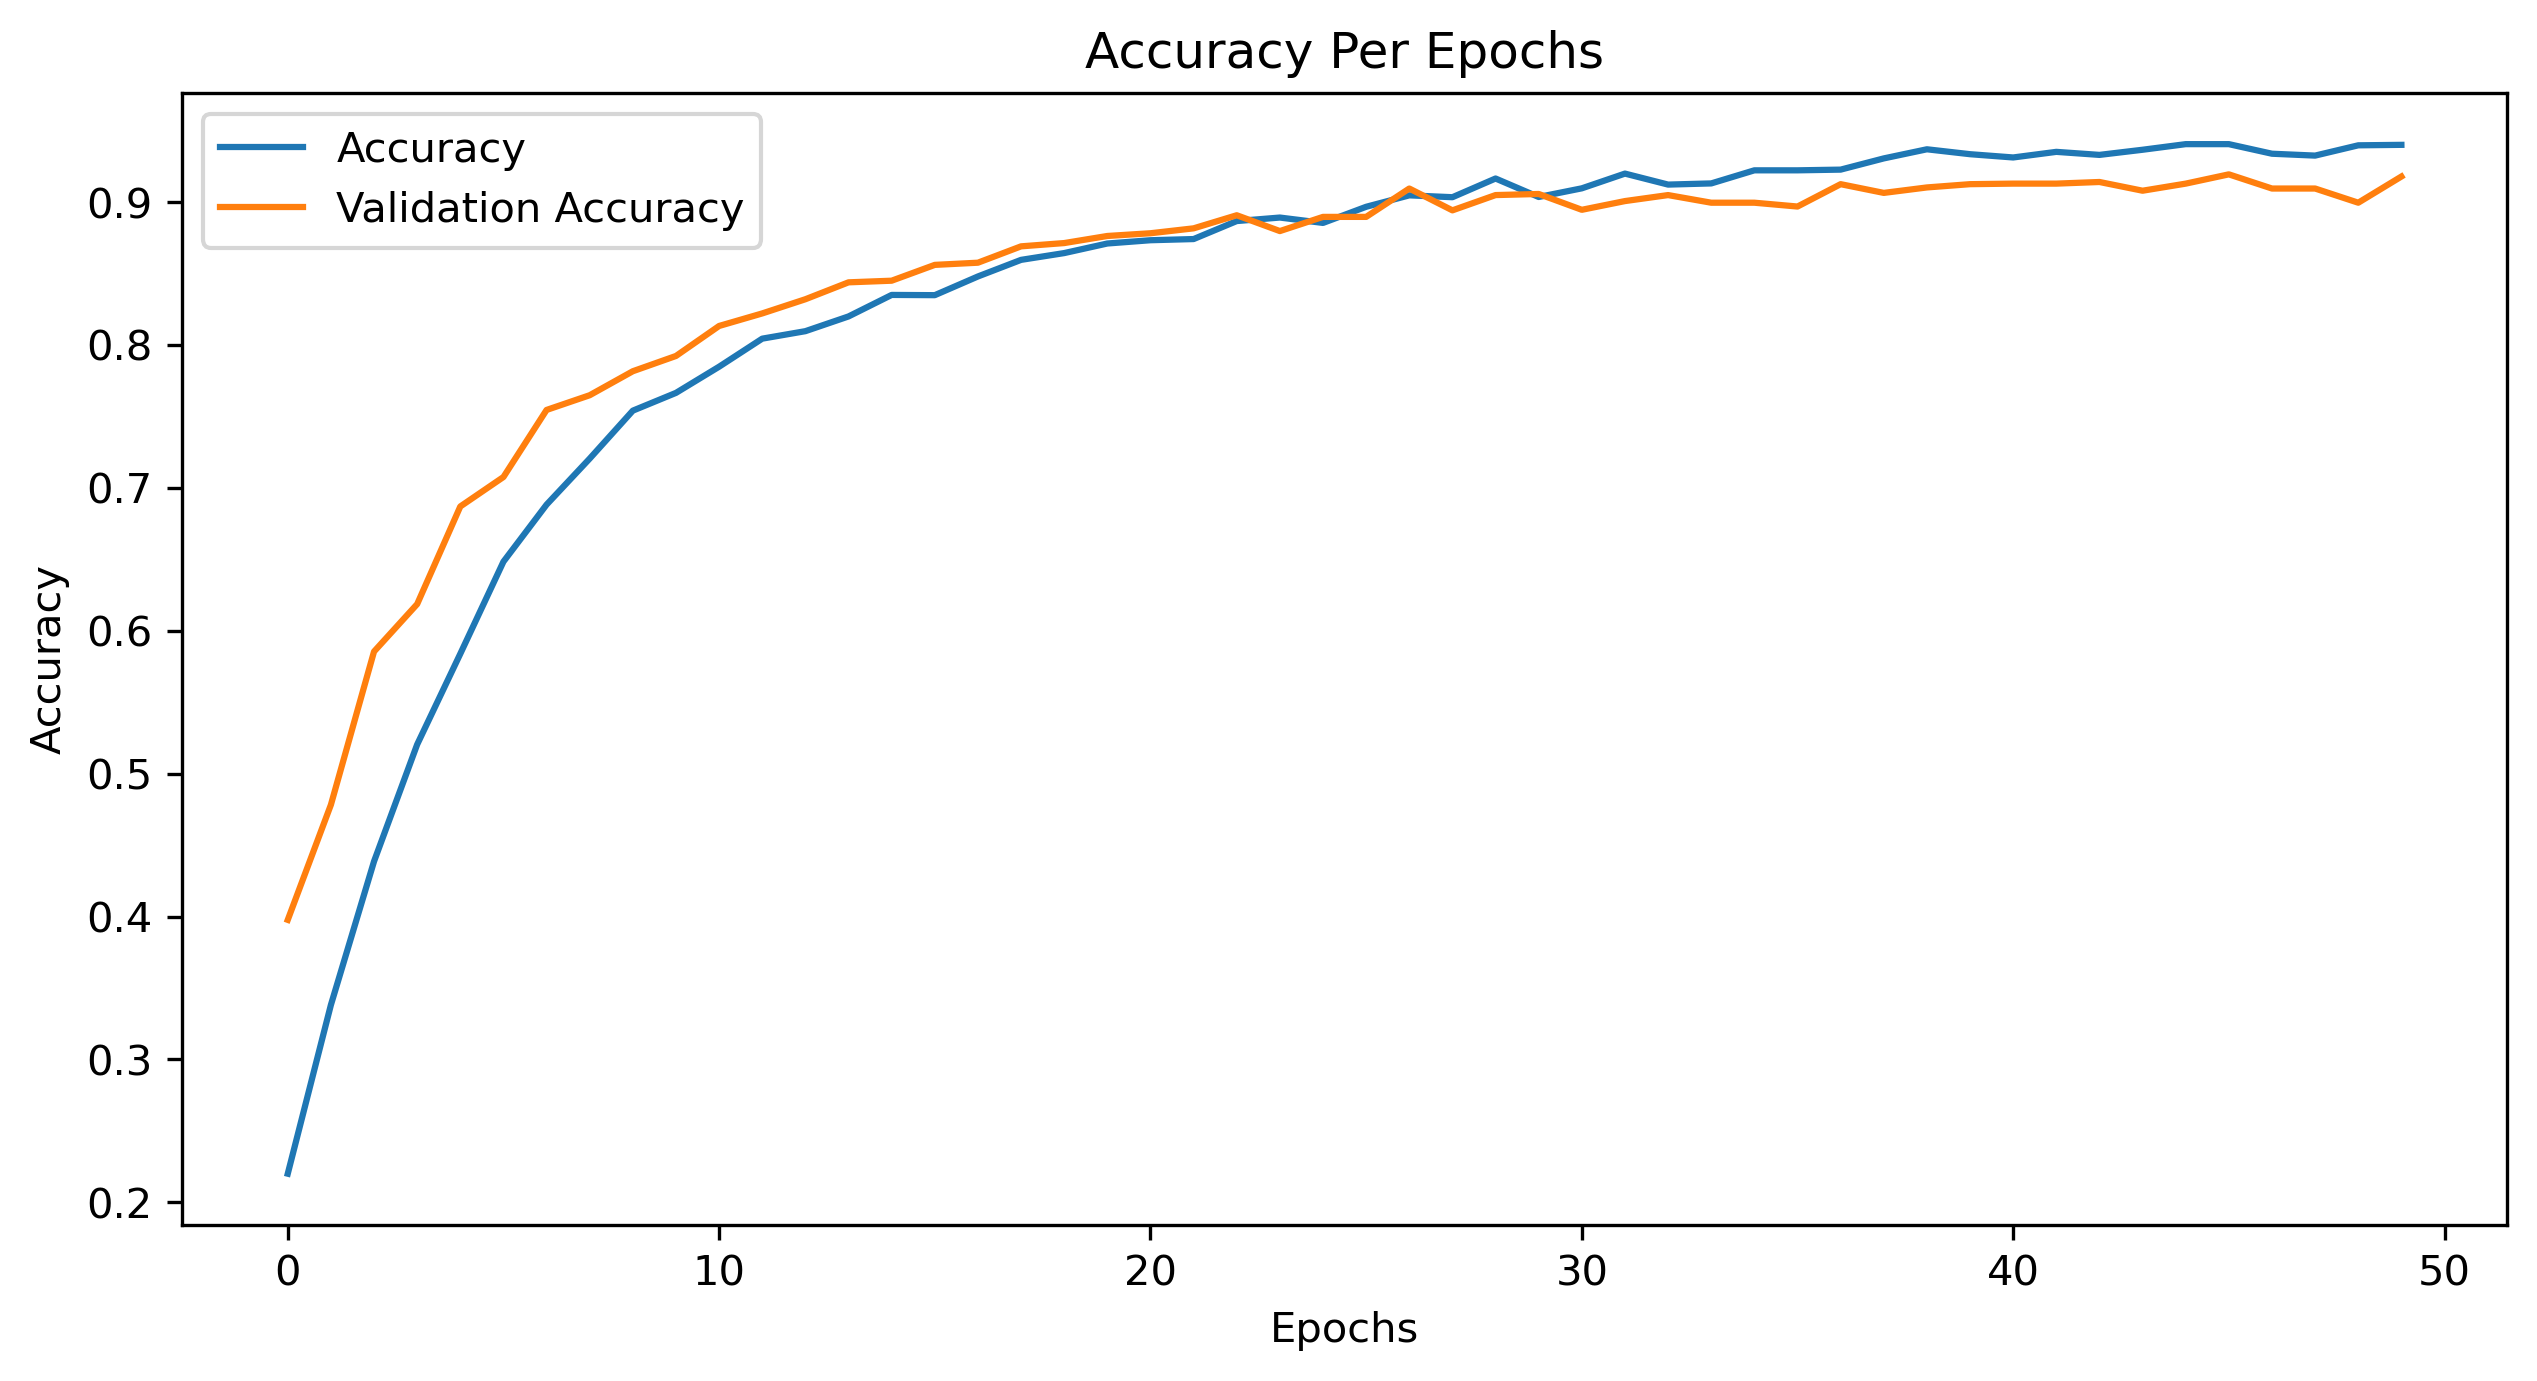

In [164]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [165]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 91.793895


In [168]:
X_train = X_train.reshape(X_train.shape[0], 16, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 16, 8, 1)

In [169]:
input_dim = (16, 8, 1)

In [235]:
CNN2D_Model = Sequential()
CNN2D_Model.add(Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1)))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.2))
CNN2D_Model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.4))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(512, activation="tanh"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout_53 (Dropout)        (None, 8, 4, 64)          0         
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 4, 2, 128)        0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 4, 2, 128)       

In [236]:
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [237]:
CNN2D_Results = CNN2D_Model.fit(
    X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test)
)

CNN2D_Model.save("Model3.h5")
print("CNN2D Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)

Epoch 1/50
96/96 [==============================] - 4s 33ms/step - loss: 1.5086 - accuracy: 0.4733 - val_loss: 1.0241 - val_accuracy: 0.6408
Epoch 2/50
96/96 [==============================] - 3s 33ms/step - loss: 0.9804 - accuracy: 0.6615 - val_loss: 0.7594 - val_accuracy: 0.7466
Epoch 3/50
96/96 [==============================] - 3s 35ms/step - loss: 0.8109 - accuracy: 0.7225 - val_loss: 0.6529 - val_accuracy: 0.7836
Epoch 4/50
96/96 [==============================] - 3s 34ms/step - loss: 0.7117 - accuracy: 0.7529 - val_loss: 0.6258 - val_accuracy: 0.7931
Epoch 5/50
96/96 [==============================] - 3s 34ms/step - loss: 0.6520 - accuracy: 0.7757 - val_loss: 0.5574 - val_accuracy: 0.8073
Epoch 6/50
96/96 [==============================] - 3s 32ms/step - loss: 0.5832 - accuracy: 0.7989 - val_loss: 0.5019 - val_accuracy: 0.8351
Epoch 7/50
96/96 [==============================] - 3s 33ms/step - loss: 0.5290 - accuracy: 0.8205 - val_loss: 0.4287 - val_accuracy: 0.8569
Epoch 8/50
96

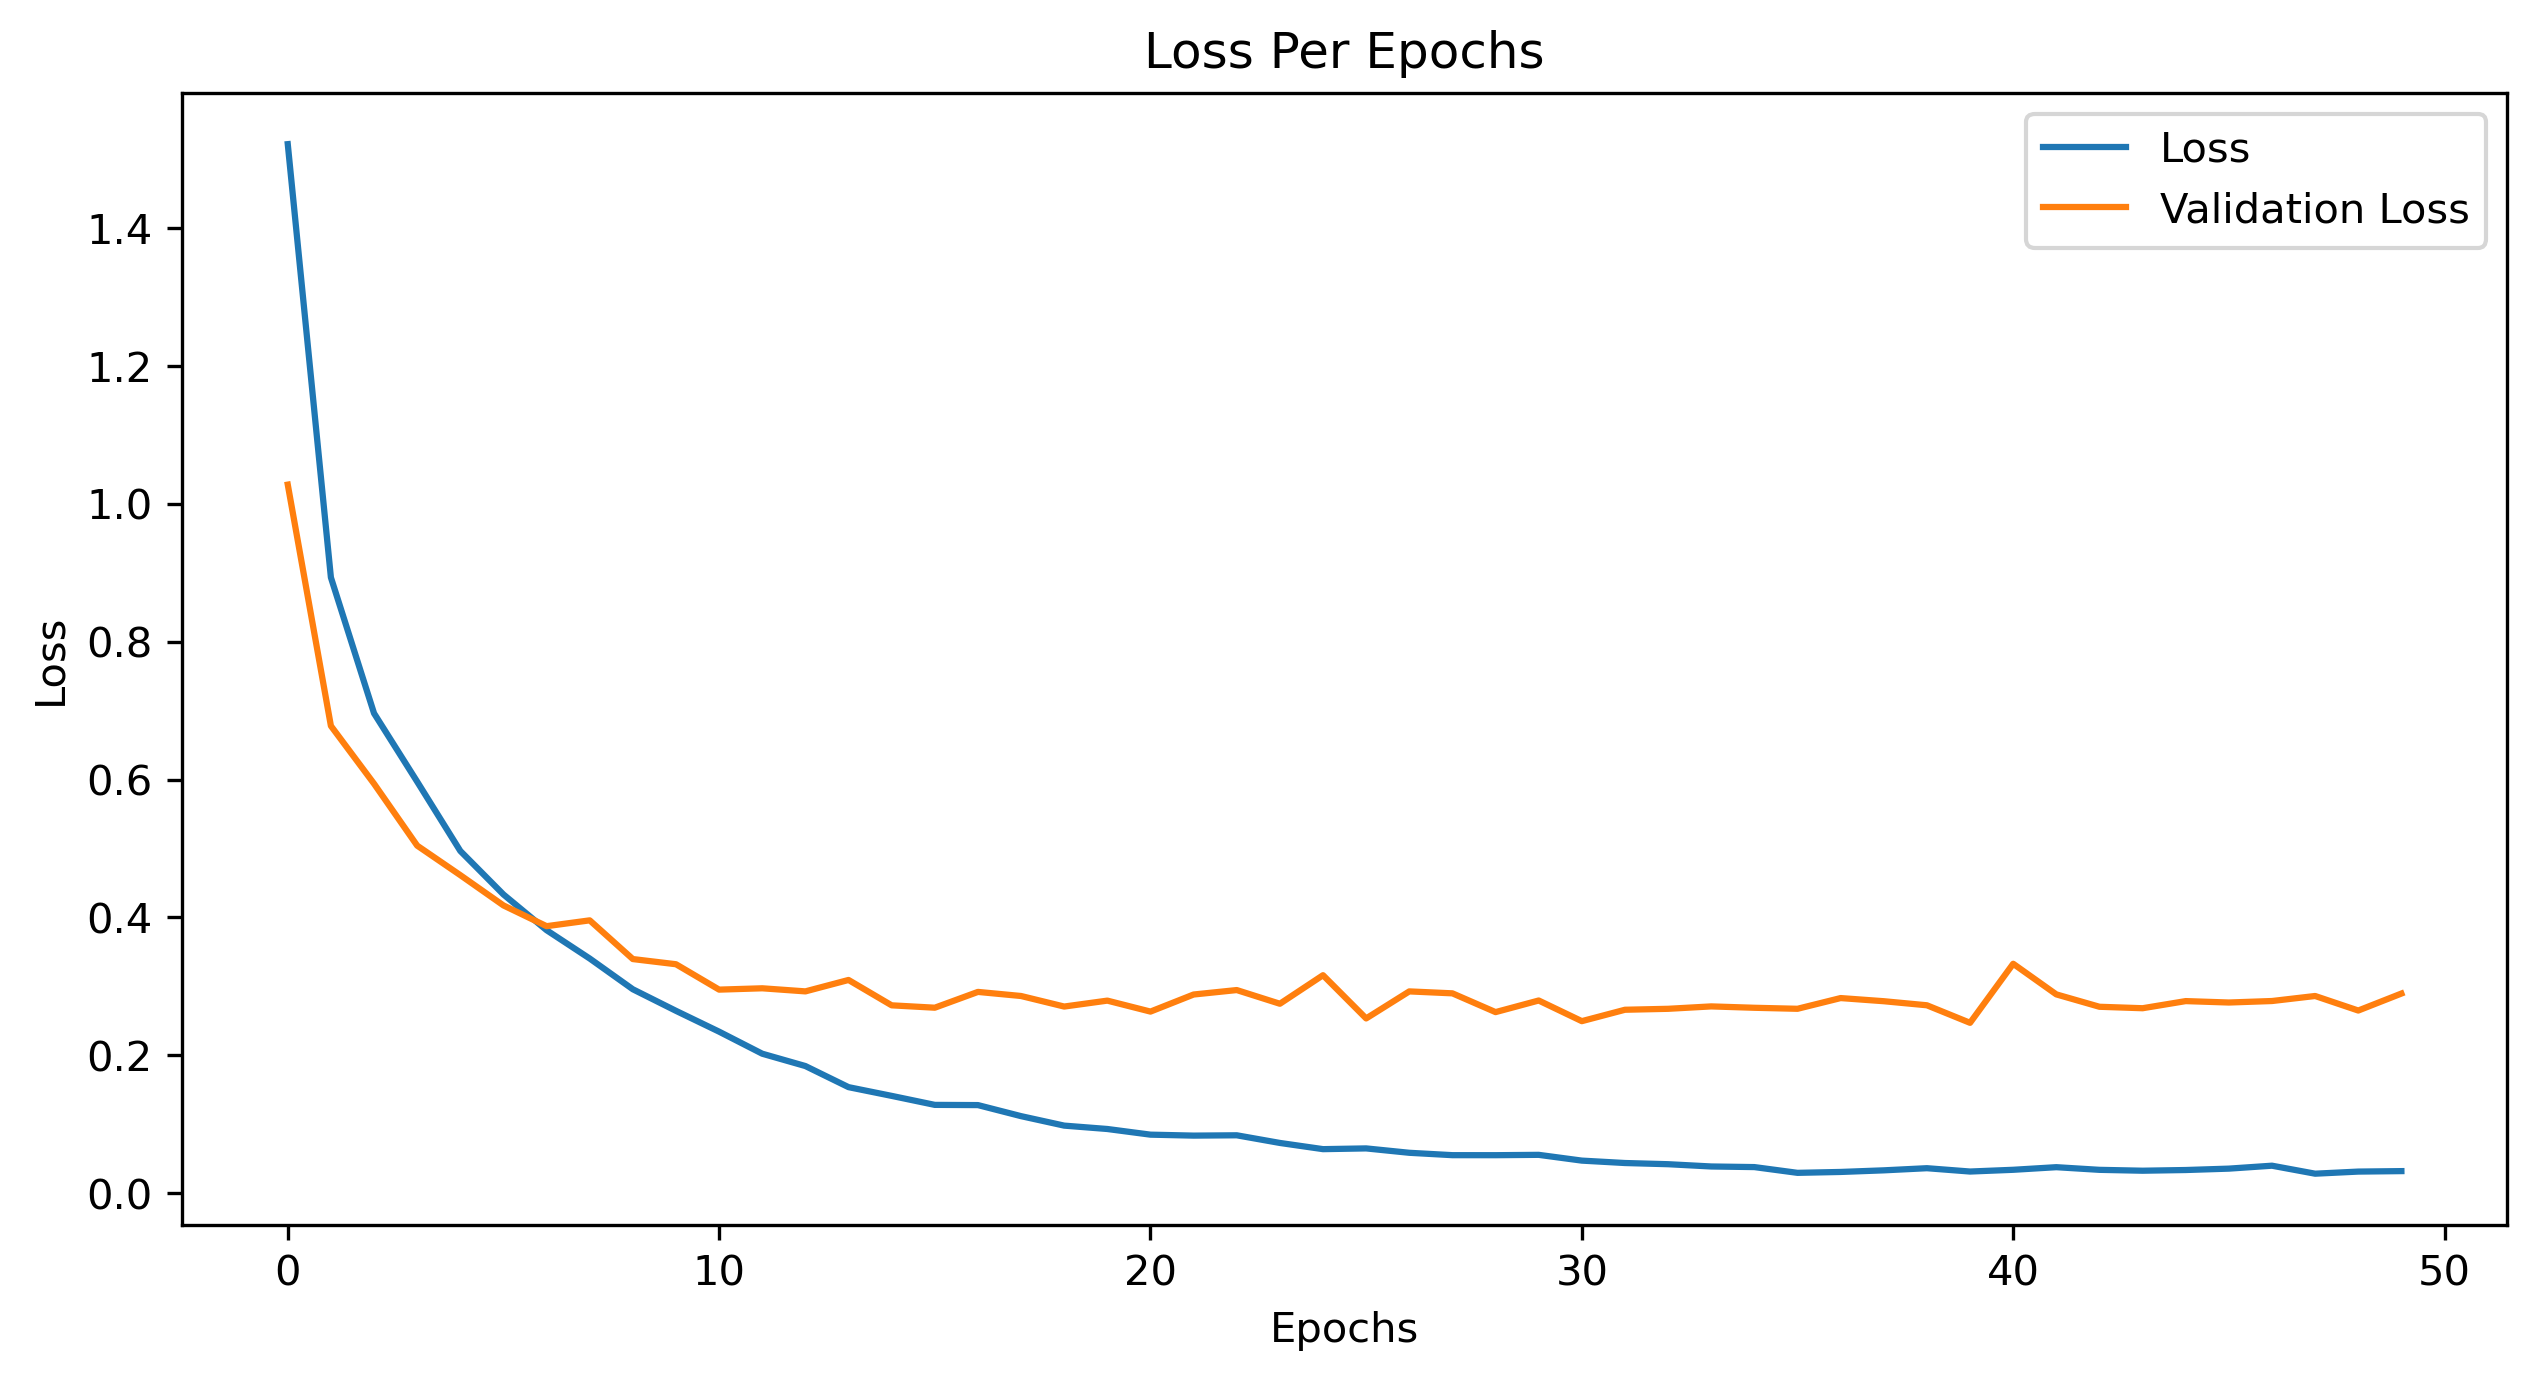

In [253]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

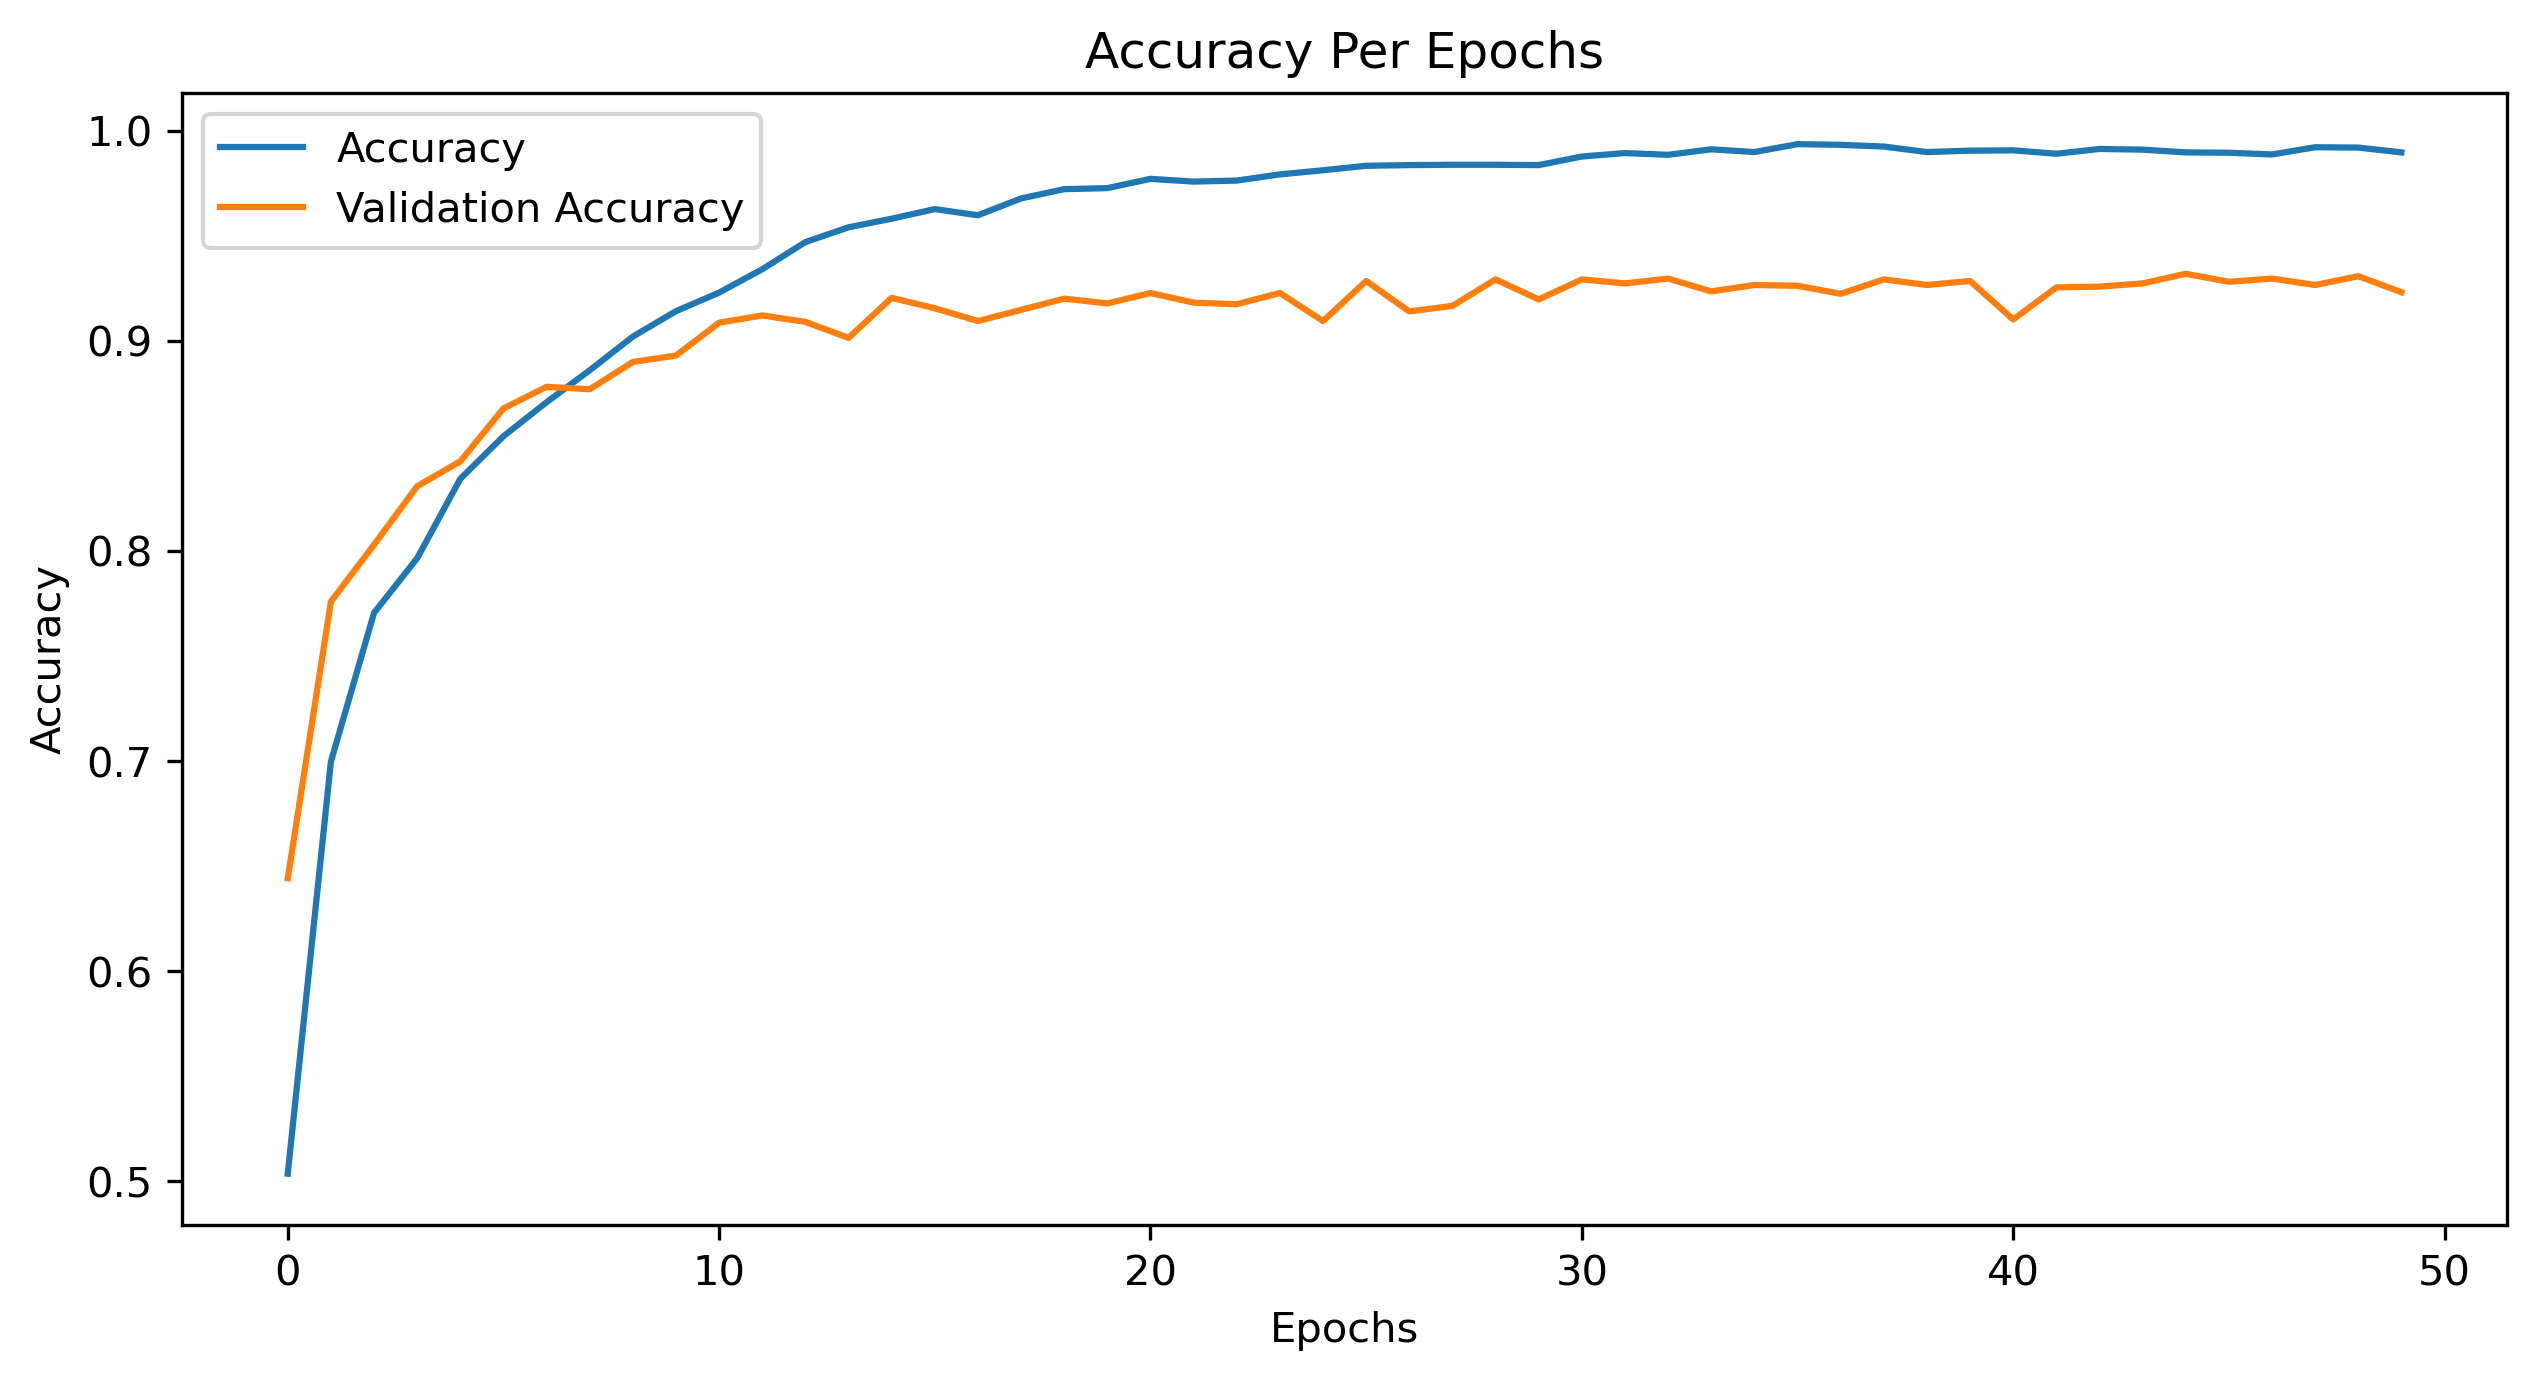

In [254]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [234]:
loss, accuracy = CNN2D_Model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 91.297710


In [264]:
CNN2D_Model = Sequential()
CNN2D_Model.add(Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1)))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.4))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(512, activation="tanh"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout_59 (Dropout)        (None, 8, 4, 64)          0         
                                                                 
 flatten_22 (Flatten)        (None, 2048)              0         
                                                                 
 dense_115 (Dense)           (None, 512)               1049088   
                                                                 
 dense_116 (Dense)           (None, 10)                5130      
                                                     

In [265]:
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [266]:
CNN2D_Results = CNN2D_Model.fit(
    X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test)
)

CNN2D_Model.save("Model3.h5")
print("CNN2D Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)

Epoch 1/50
96/96 [==============================] - 3s 22ms/step - loss: 1.5451 - accuracy: 0.4912 - val_loss: 0.9974 - val_accuracy: 0.6542
Epoch 2/50
96/96 [==============================] - 2s 21ms/step - loss: 0.8741 - accuracy: 0.7035 - val_loss: 0.7667 - val_accuracy: 0.7462
Epoch 3/50
96/96 [==============================] - 2s 21ms/step - loss: 0.6995 - accuracy: 0.7690 - val_loss: 0.5756 - val_accuracy: 0.8076
Epoch 4/50
96/96 [==============================] - 2s 24ms/step - loss: 0.6034 - accuracy: 0.7965 - val_loss: 0.5661 - val_accuracy: 0.8141
Epoch 5/50
96/96 [==============================] - 2s 24ms/step - loss: 0.4974 - accuracy: 0.8261 - val_loss: 0.4651 - val_accuracy: 0.8473
Epoch 6/50
96/96 [==============================] - 2s 24ms/step - loss: 0.4565 - accuracy: 0.8464 - val_loss: 0.4266 - val_accuracy: 0.8626
Epoch 7/50
96/96 [==============================] - 2s 24ms/step - loss: 0.4043 - accuracy: 0.8670 - val_loss: 0.4144 - val_accuracy: 0.8702
Epoch 8/50
96

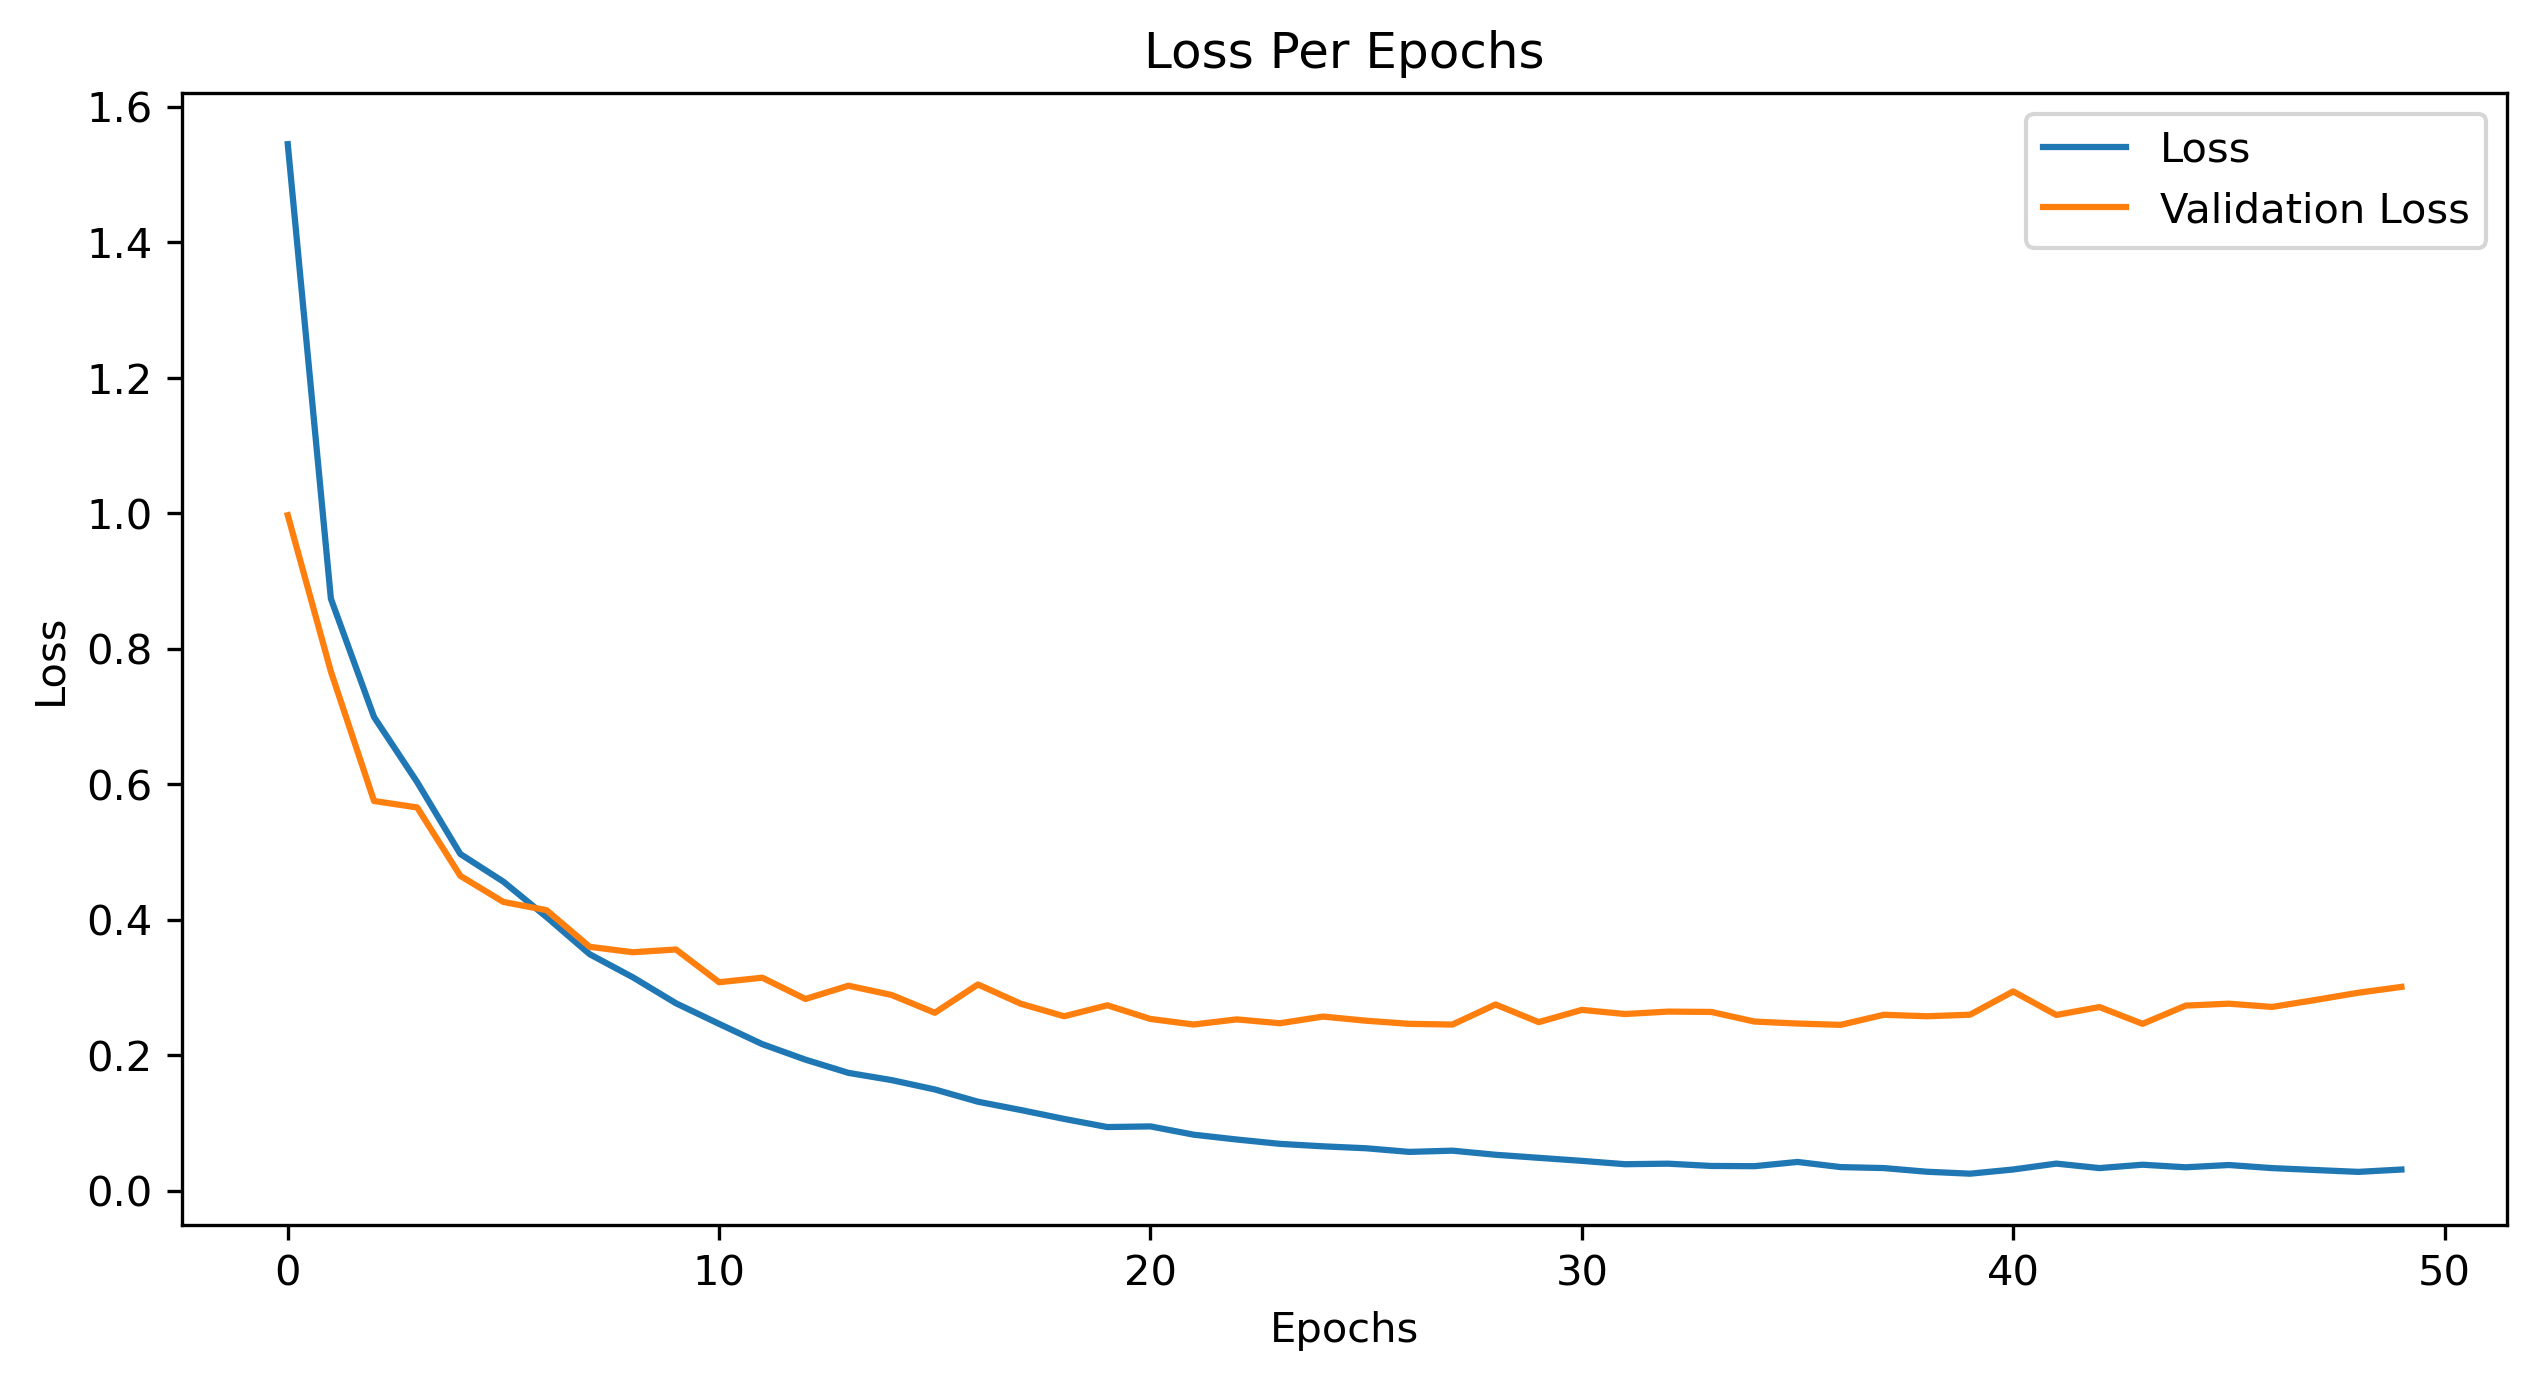

In [267]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

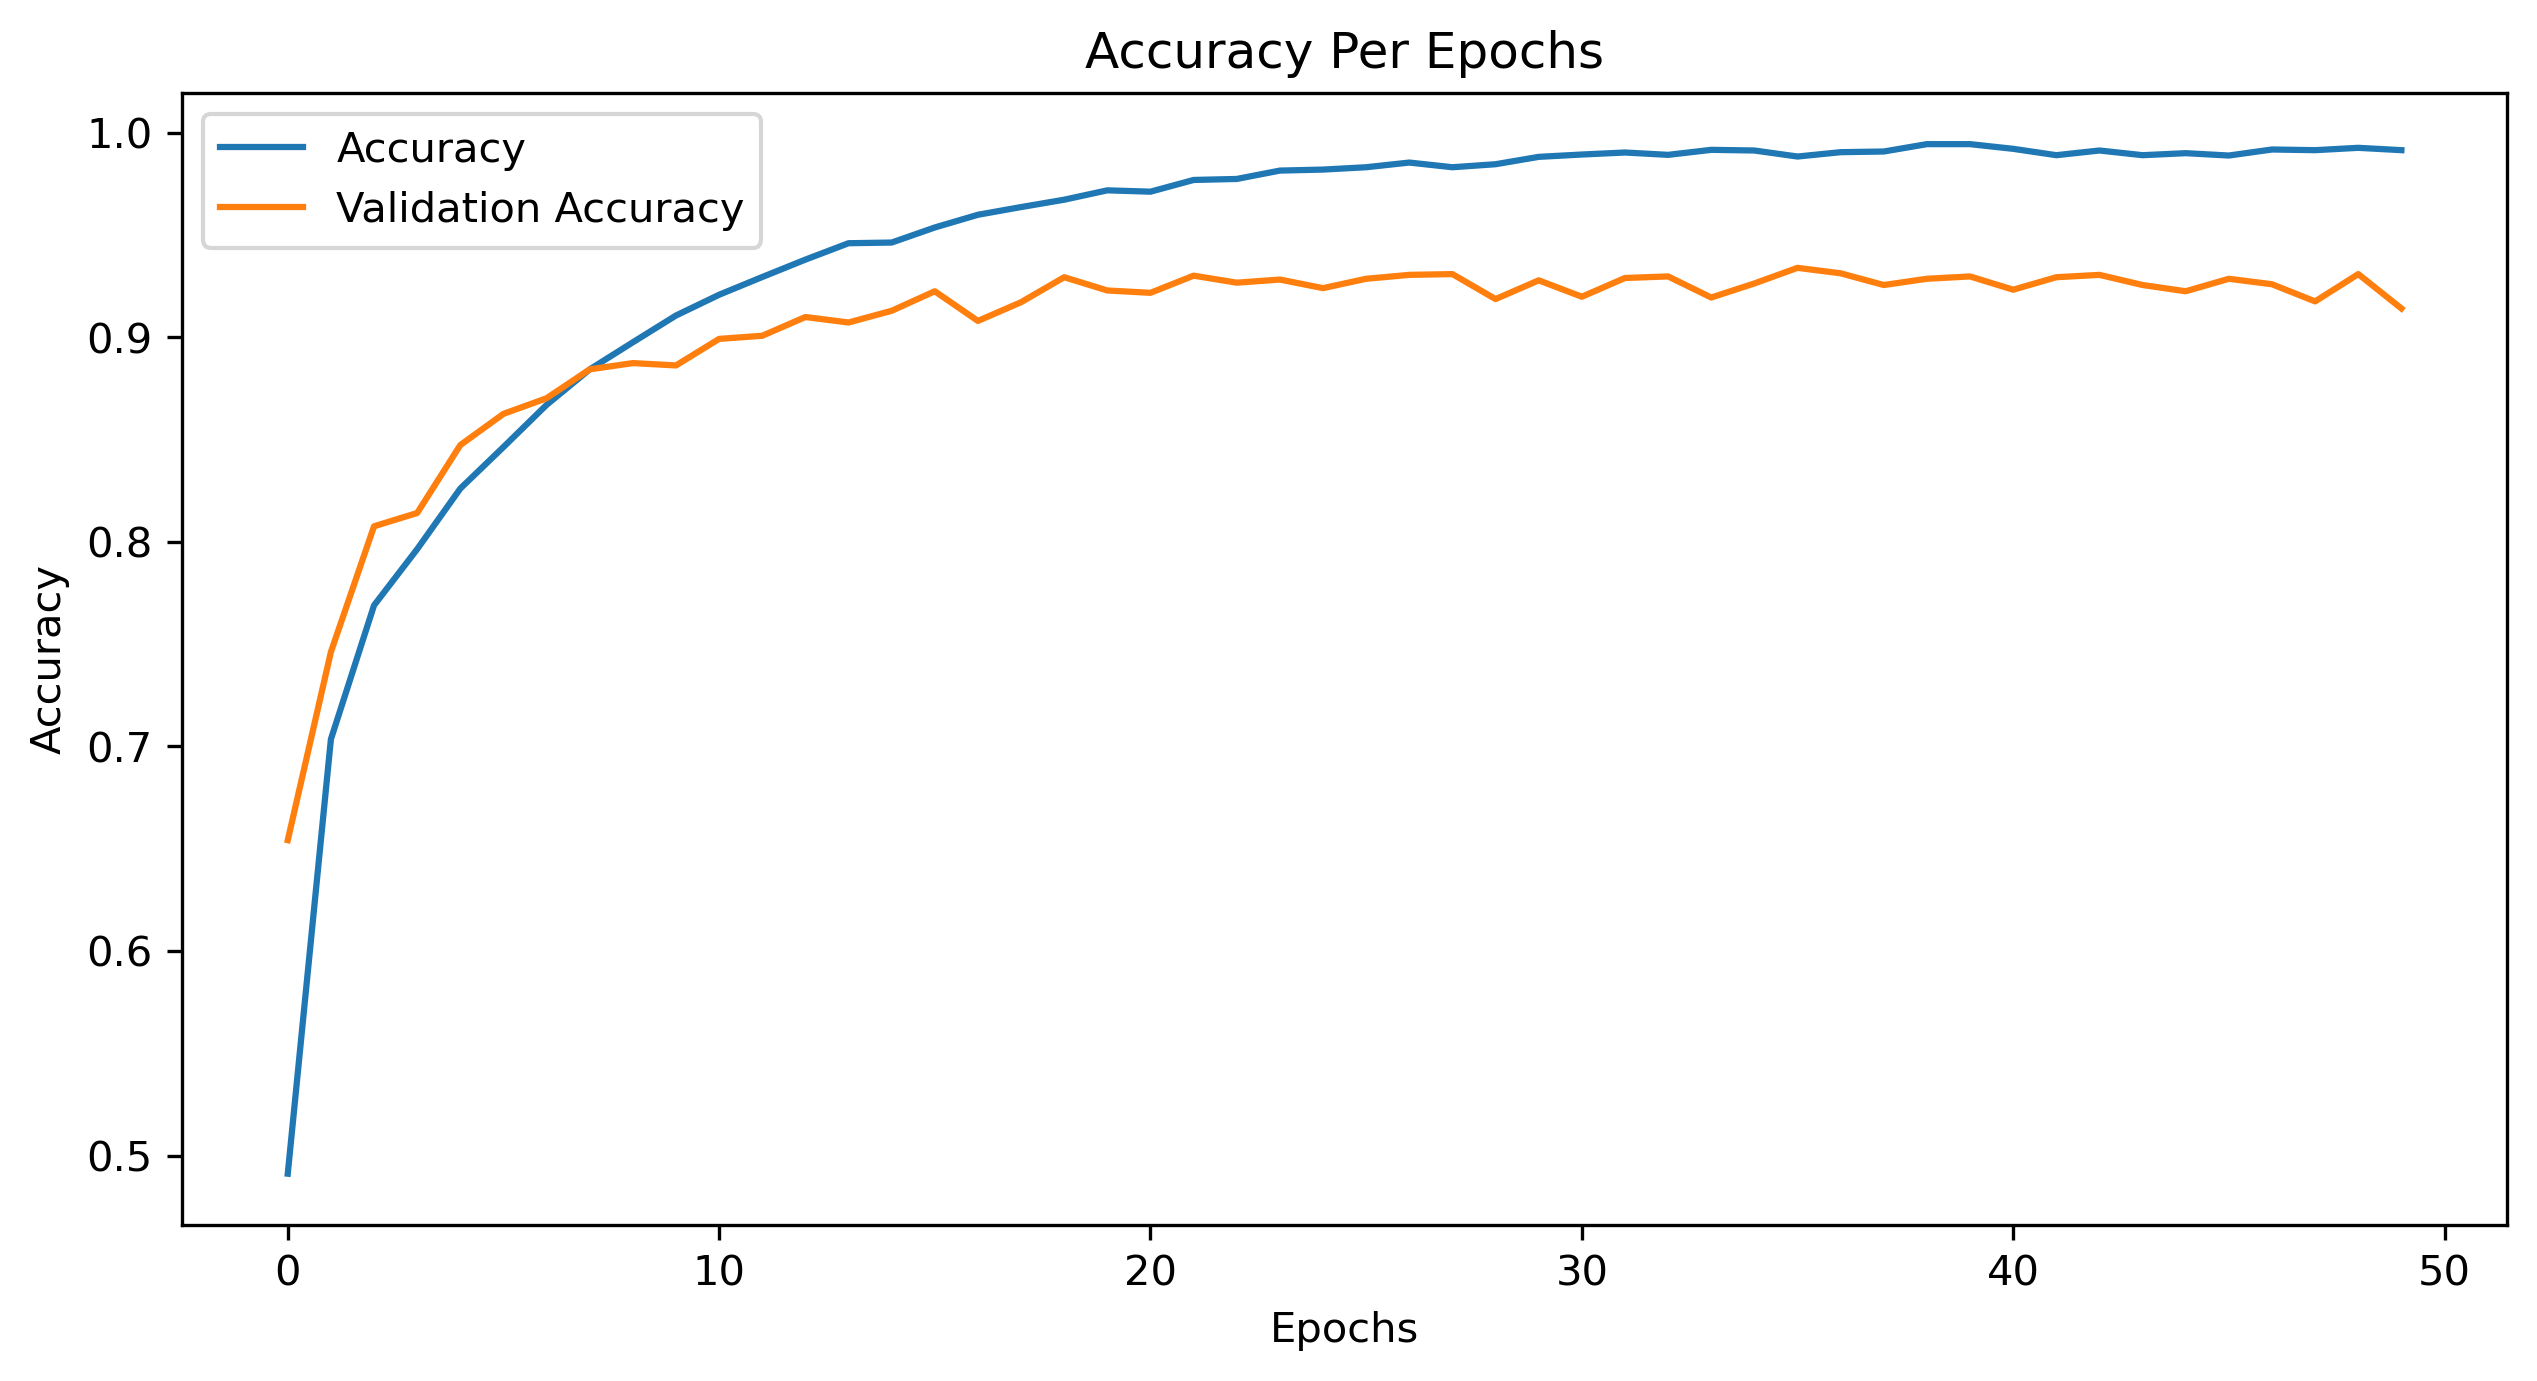

In [268]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [269]:
loss, accuracy = CNN2D_Model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 91.412216


In [270]:
train_hist_m3

,loss,accuracy,val_loss,val_accuracy
0,1.545085,0.491165,0.997398,0.654198
1,0.874107,0.703534,0.766674,0.746183
2,0.699536,0.768979,0.575589,0.807634
3,0.603442,0.796466,0.566079,0.814122
4,0.497383,0.826080,0.465091,0.847328
5,0.456479,0.846368,0.426570,0.862595
6,0.404274,0.866983,0.414405,0.870229
7,0.349415,0.884326,0.360333,0.884351
8,0.315396,0.897579,0.352367,0.887405
9,0.277015,0.910668,0.356423,0.886260
